# hierarchical

In [25]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [26]:
air = pd.read_csv("EastWestAirlines.csv")

In [27]:
air.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


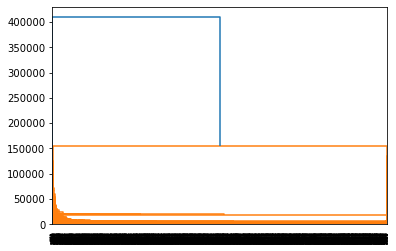

In [28]:
dendrogram = sch.dendrogram(sch.linkage(air, method ='single'))

In [29]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(air.iloc[:,1:])

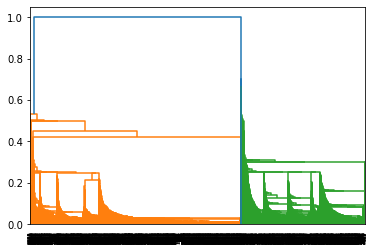

In [31]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method ='single'))

In [32]:
# create cluster
hc = AgglomerativeClustering(n_clusters=4, affinity ='euclidean', linkage ='single')

In [36]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [38]:
final_data = pd.concat([Clusters,air])
final_data

,Clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,NaN,4017.0,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,NaN,4018.0,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,NaN,4019.0,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,NaN,4020.0,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


In [41]:
frames = ['Clusters','air']
final_data = pd.concat([Clusters,air], axis =1)
final_data

,Clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,1,28143,0,1,1,1,174,1,0,0,7000,0
1,1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,1,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,1,4,14776,0,1,1,1,500,1,0,0,6952,0
4,0,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,0,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,0,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,1,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
final_data.groupby('Clusters').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,1743.580122,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0
3,2862.000000,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0


In [44]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='single')

y_hc= hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
final_data=pd.concat([Clusters,air], axis=1)
final_data.groupby('Clusters').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


# K-Means


In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [46]:
air = pd.read_csv("EastWestAirlines.csv")

In [47]:
air.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [48]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


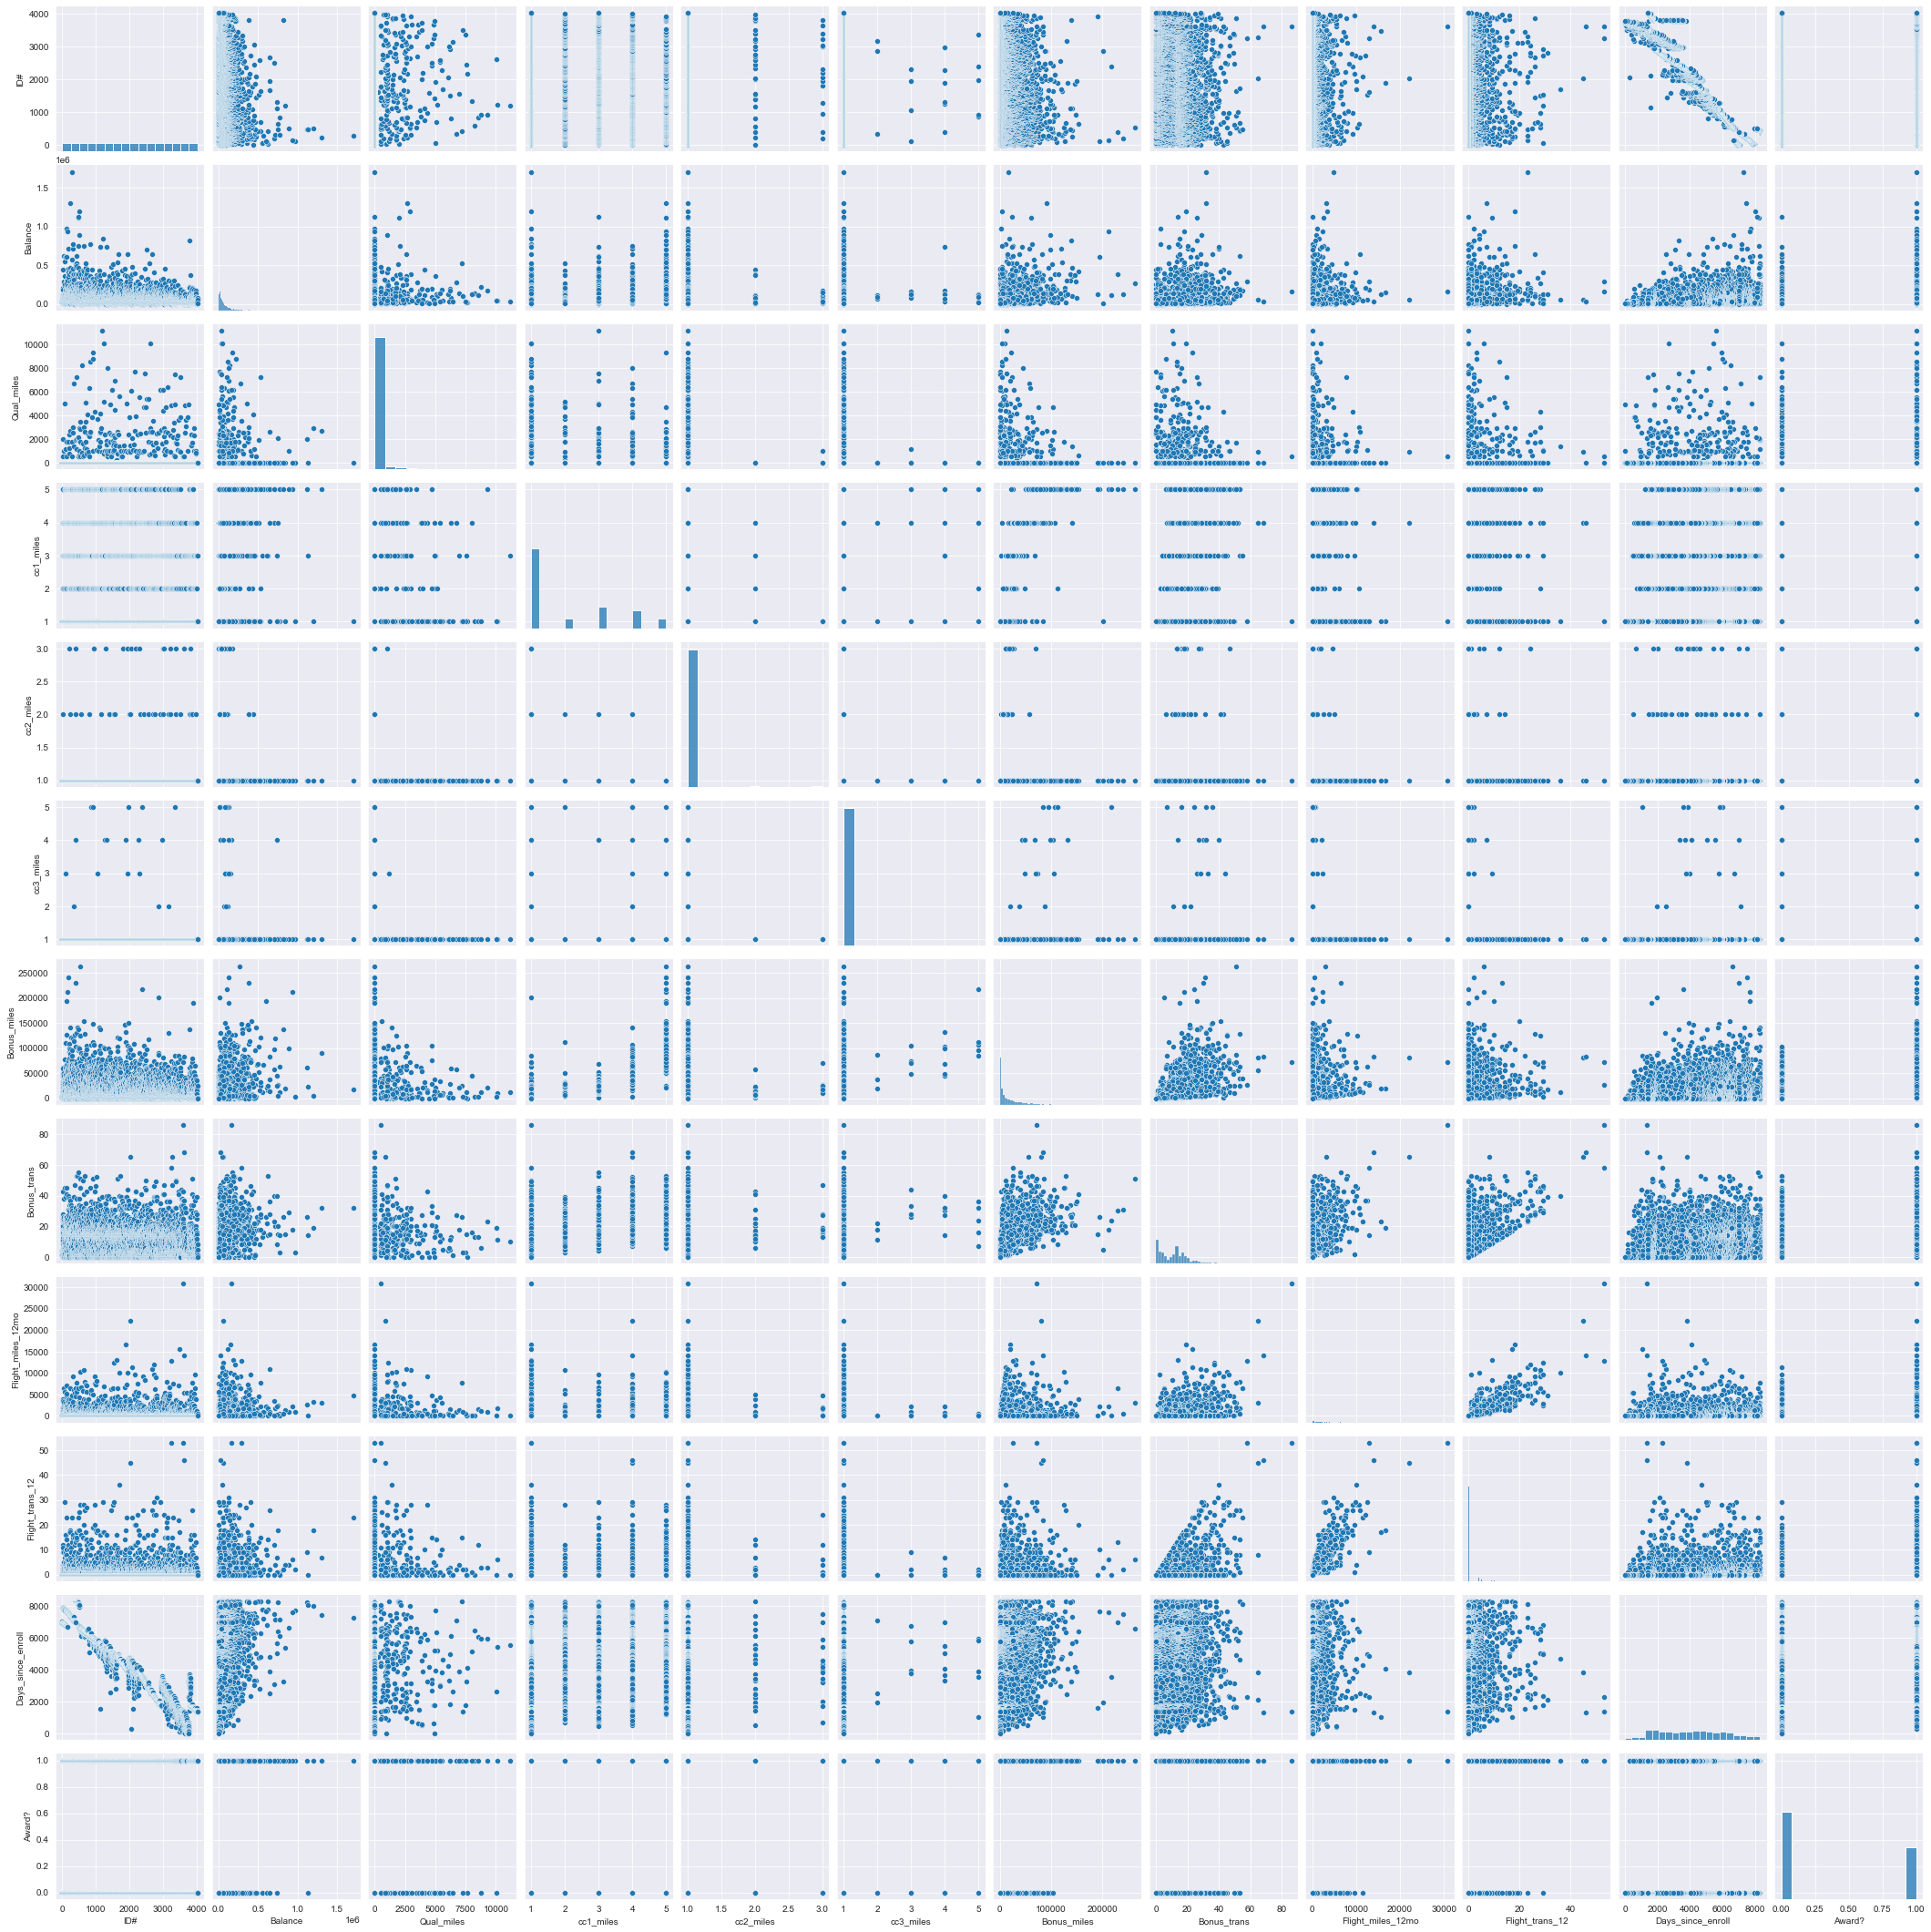

In [50]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(air)

In [58]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_air_df = scaler.fit_transform(air.iloc[:,1:])

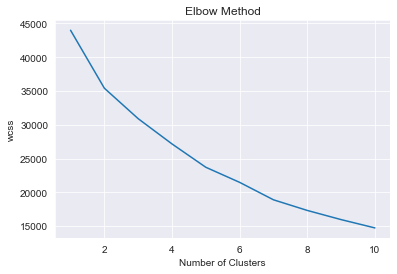

In [62]:
# finding optimum number of cluster
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_air_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [68]:
# build cluster algorithm
# making 6 cluster 
 
from sklearn.cluster import KMeans
clusters_new =KMeans(6,random_state=42)
clusters_new.fit(scaler_air_df)

KMeans(n_clusters=6, random_state=42)

In [69]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [71]:
# Assigen cluster in data
air['clusterid_new']=clusters_new.labels_

In [72]:
clusters_new.cluster_centers_

array([[-3.00848909e-01, -1.31146780e-01, -6.13491098e-01,
        -9.82418871e-02, -6.06935238e-02, -5.22951732e-01,
        -5.02877272e-01, -1.78760113e-01, -1.93256108e-01,
        -2.06496348e-01, -3.52919418e-01],
       [ 4.25166743e-01, -1.09383800e-01,  1.18102682e+00,
        -9.82418871e-02, -5.47312520e-02,  8.94718692e-01,
         7.42329011e-01, -7.97572170e-02, -8.75431581e-02,
         3.72806369e-01,  5.61665047e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 1.23710416e+00,  4.94893896e-01,  2.09648714e-01,
        -9.82418871e-02, -6.27665798e-02,  7.98816977e-01,
         1.79329606e+00,  3.85383987e+00,  4.13575386e+00,
         2.84717914e-01,  9.35769278e-01],
       [ 4.45357693e-01,  6.74503311e+00, -7.95461087e-02,
        -9.82418871e-02, -6.27665798e-02,  4.72243529e-03,
  

In [73]:
air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2241.601294,43318.631217,42.629195,1.216336,1.000000,1.000404,4526.021431,6.778002,209.615851,0.640113,3693.763850,0.199757
1,1,1597.830322,116495.663786,59.592302,3.686567,1.000000,1.001571,38786.016496,18.739199,348.940299,1.043205,4887.141398,0.642577
2,2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,1734.266667,198255.733333,526.948148,2.348148,1.000000,1.000000,36434.637037,28.822222,5855.562963,17.059259,4706.466667,0.822222
4,4,2051.050000,118476.933333,5361.850000,1.950000,1.000000,1.000000,17258.883333,11.883333,900.466667,2.666667,3981.083333,0.550000
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


In [76]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [78]:
# build cluster algorithm
# making 4 Cluster
from sklearn.cluster import KMeans
clusters_new =KMeans(4,random_state=42)
clusters_new.fit(scaler_air_df)

KMeans(n_clusters=4, random_state=42)

In [79]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [80]:
# Assigen cluster in data
air['clusterid_new']=clusters_new.labels_

In [81]:
clusters_new.cluster_centers_

array([[-0.29164389, -0.06132368, -0.60152323,  0.03125746, -0.06076794,
        -0.5117271 , -0.4819973 , -0.18694933, -0.19911352, -0.20166452,
        -0.3467728 ],
       [ 1.19834441,  0.82002725,  0.06242226,  0.14807116, -0.06276658,
         0.58267436,  1.59217228,  3.53177027,  3.79414404,  0.28312709,
         0.9023012 ],
       [ 0.43006424,  0.01841925,  1.20706456, -0.08206289, -0.0546097 ,
         0.92971332,  0.75392632, -0.08287448, -0.09283538,  0.37145869,
         0.58506057],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [82]:
air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2238.186083,44202.374902,96.865520,1.228694,1.019156,1.000391,4767.366302,6.957780,198.688428,0.619234,3701.567240,0.202111
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1602.838224,116671.953212,157.735131,3.716891,1.002379,1.001586,39498.719270,18.826328,342.704203,1.018239,4882.059477,0.652657
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [83]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# DBSCAN

In [85]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
df = pd.read_csv("EastWestAirlines.csv")
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [89]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [90]:
array=df.values

In [91]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [92]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [93]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [95]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [96]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [98]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [100]:
pd.concat([df,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
